In [ ]:
import numpy as np
from PIL import Image
im = Image.open('00.ico')
im = im.convert('RGBA')
im

In [ ]:
print(im.size)
im_matrix = np.array(im)
print(im_matrix[0][0])

(16, 16)
[0 0 0 0]


In [ ]:
for i in range(16):
  for j in range(16):
    print(1 if im_matrix[i][j][-1] else 0, end="")
  print()

0000000000000000
0000000000000000
0000000000000000
0010001000000000
0011010000011010
0001100000001100
0000100000011100
0001010000110100
0001000000000000
0000000000000000
0000000000000000
0000000000000000
0000110110110000
0000000000000000
0000000000000000
0000000000000000


In [ ]:
def make_bin_im(im_matrix):
  im_bin = []
  for i in range(16):
    for j in range(16):
      im_bin.append(1 if im_matrix[i][j][-1] else 0)
  return im_bin

In [ ]:
from sklearn.neural_network import MLPClassifier

im_10 = make_bin_im(im_matrix)
clf = MLPClassifier(random_state=42).fit([im_10,], [1,])

In [ ]:
X_train = []
def train_add(sp):
  for ico in sp:
    im = Image.open(ico)
    im = im.convert('RGBA')
    im_matrix = np.array(im)
    im_ = make_bin_im(im_matrix)
    X_train.append(im_)
y_train = [1, 0]


X_test = []
def test_add(sp):
  for ico in ['11.ico', '01.ico']:
    im = Image.open(ico)
    im = im.convert('RGBA')
    im_matrix = np.array(im)
    im_ = make_bin_im(im_matrix)
    X_test.append(im_)
y_test = [1, 0]

In [ ]:
from pprint import pprint

In [ ]:
X_train = []
X_test = []
def augmitation_train(ico):
  for im in ico:
    im = Image.open(im)
    im = im.convert('RGBA')
    im_matrix = np.array(im)
    for i in range(5):
      ch_matrix1 = np.roll(im_matrix, i, axis=1)
      ch_matrix2 = np.roll(im_matrix, i, axis=0)
      ch_matrix11 = np.roll(im_matrix, -i, axis=1)
      ch_matrix21 = np.roll(im_matrix, -i, axis=0)
      ch_matrix3 = np.concatenate((ch_matrix1[:, :8], ch_matrix11[:, 8:]), axis=1)
      ch_matrix31 = np.concatenate((ch_matrix2[:8, :], ch_matrix21[8:, :]), axis=0)
      ch_matrix4 = np.concatenate((ch_matrix11[:, :8], ch_matrix1[:, 8:]), axis=1)
      ch_matrix41 = np.concatenate((ch_matrix21[8:, :], ch_matrix2[:8, :]), axis=0)

      X_train.append(make_bin_im(ch_matrix1))
      X_train.append(make_bin_im(ch_matrix11))
      X_train.append(make_bin_im(ch_matrix2))
      X_train.append(make_bin_im(ch_matrix21))
      X_train.append(make_bin_im(ch_matrix3))
      X_train.append(make_bin_im(ch_matrix31))
      X_train.append(make_bin_im(ch_matrix4))
      X_train.append(make_bin_im(ch_matrix41))


augmitation_train(['00.ico', '10.ico'])
print(len(X_train))
y_train = [1] * 40 + [0] * 40
print(y_train)

def augmitation_test(ico):
  for im in ico:
    im = Image.open(im)
    im = im.convert('RGBA')
    im_matrix = np.array(im)
    for i in range(5):
      ch_matrix1 = np.roll(im_matrix, i, axis=1)
      ch_matrix2 = np.roll(im_matrix, i, axis=0)
      ch_matrix11 = np.roll(im_matrix, -i, axis=1)
      ch_matrix21 = np.roll(im_matrix, -i, axis=0)
      ch_matrix3 = np.concatenate((ch_matrix1[:, :8], ch_matrix11[:, 8:]), axis=1)
      ch_matrix31 = np.concatenate((ch_matrix2[:8, :], ch_matrix21[8:, :]), axis=0)
      ch_matrix4 = np.concatenate((ch_matrix11[:, :8], ch_matrix1[:, 8:]), axis=1)
      ch_matrix41 = np.concatenate((ch_matrix21[8:, :], ch_matrix2[:8, :]), axis=0)

      X_test.append(make_bin_im(ch_matrix1))
      X_test.append(make_bin_im(ch_matrix11))
      X_test.append(make_bin_im(ch_matrix2))
      X_test.append(make_bin_im(ch_matrix21))
      X_test.append(make_bin_im(ch_matrix3))
      X_test.append(make_bin_im(ch_matrix31))
      X_test.append(make_bin_im(ch_matrix4))
      X_test.append(make_bin_im(ch_matrix41))

augmitation_test(['00.ico', '10.ico'])

y_test = [1] * 40 + [0] * 40

80
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(X_test)

80

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(20,), random_state=42).fit(X_train, y_train)
clf.predict_proba(X_test)

In [ ]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf.score(X_test, y_test)

1.0

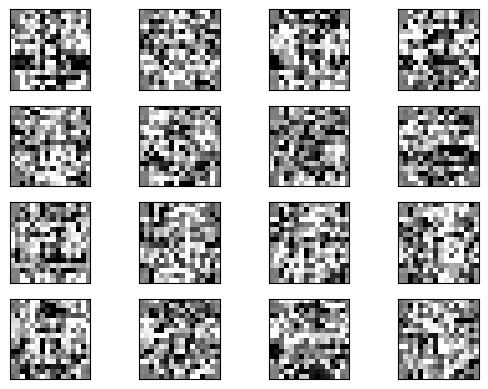

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(16, 16), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()